Importing libraries per the provided source code.

In [20]:
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mounting google drive.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the data file as pandas data frame.

In [21]:
dataset = pd.read_csv("/content/drive/MyDrive/data/input_file.txt",delimiter="\t")
dataset

,"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."


Converting dataframe to a string, removing characters not originally in text file.

In [28]:
text = dataset.to_string()
text = text[26:-11]
text

"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."

Converting string into words.

In [5]:
tokenized_word = word_tokenize(text)
print(tokenized_word)
len(tokenized_word)

['Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.']


65

First task: Create frequency distribution based on parts of speech and determine the number of proper nouns mentioned.

In [12]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag #part of speech function

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
pos = pos_tag(tokenized_word) # determine part of speech of each word
postags = [x for _,x in pos] # create a list of just the parts of speech
print(pos)
print(postags)

posdist = FreqDist(postags)
posdist['NNP'] + posdist['NNPS']

[('Text', 'NN'), ('Analytics', 'NNP'), ('has', 'VBZ'), ('lots', 'NNS'), ('of', 'IN'), ('applications', 'NNS'), ('in', 'IN'), ('today', 'NN'), ("'s", 'POS'), ('online', 'JJ'), ('world', 'NN'), ('.', '.'), ('By', 'IN'), ('analyzing', 'VBG'), ('tweets', 'NNS'), ('on', 'IN'), ('Twitter', 'NNP'), (',', ','), ('we', 'PRP'), ('can', 'MD'), ('find', 'VB'), ('trending', 'JJ'), ('news', 'NN'), ('and', 'CC'), ('peoples', 'NNS'), ('reaction', 'NN'), ('on', 'IN'), ('a', 'DT'), ('particular', 'JJ'), ('event', 'NN'), ('.', '.'), ('Amazon', 'NNP'), ('can', 'MD'), ('understand', 'VB'), ('user', 'JJ'), ('feedback', 'NN'), ('or', 'CC'), ('review', 'NN'), ('on', 'IN'), ('the', 'DT'), ('specific', 'JJ'), ('product', 'NN'), ('.', '.'), ('BookMyShow', 'NNP'), ('can', 'MD'), ('discover', 'VB'), ('people', 'NNS'), ("'s", 'POS'), ('opinion', 'NN'), ('about', 'IN'), ('the', 'DT'), ('movie', 'NN'), ('.', '.'), ('Youtube', 'NN'), ('can', 'MD'), ('also', 'RB'), ('analyze', 'VB'), ('and', 'CC'), ('understand', 'VB')

4

The result looks promising, but a quick look shows that "Analytics" was falsely flagged as a proper noun while Youtube was considered just a noun.

Second task: Create a word cloud based on the frequency of each word in the text.

In [14]:
import collections # word frequency statistics library
import numpy as np # numpy data processing library
import wordcloud # word cloud display library
from PIL import Image # Image processing library
import matplotlib.pyplot as plt # Image library

In [15]:
word_list = []
remove_words = ['.',':','[',']']

for word in tokenized_word: # Read each word in a loop
    if word not in remove_words:
        word_list.append(word) # word append to list

# Word frequency statistics
word_counts = collections.Counter(word_list) # Do word frequency statistics for word segmentation
print (word_counts) 

Counter({'on': 4, 'can': 4, "'s": 2, 'and': 2, 'peoples': 2, 'a': 2, 'understand': 2, 'the': 2, 'Text': 1, 'Analytics': 1, 'has': 1, 'lots': 1, 'of': 1, 'applications': 1, 'in': 1, 'today': 1, 'online': 1, 'world': 1, 'By': 1, 'analyzing': 1, 'tweets': 1, 'Twitter': 1, ',': 1, 'we': 1, 'find': 1, 'trending': 1, 'news': 1, 'reaction': 1, 'particular': 1, 'event': 1, 'Amazon': 1, 'user': 1, 'feedback': 1, 'or': 1, 'review': 1, 'specific': 1, 'product': 1, 'BookMyShow': 1, 'discover': 1, 'people': 1, 'opinion': 1, 'about': 1, 'movie': 1, 'Youtube': 1, 'also': 1, 'analyze': 1, 'viewpoints': 1, 'video': 1})


In [22]:
mask = np.array(Image.open('/content/drive/MyDrive/pic/Snorlax.png')) # Define word frequency context
wc = wordcloud.WordCloud(
    mask=mask, # set background image
    max_words=50, # maximum number of words displayed
    max_font_size=300 # font max
)

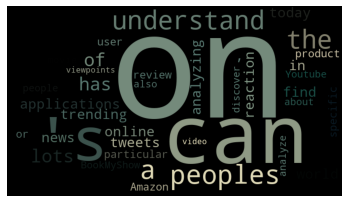

In [23]:
wc.generate_from_frequencies(word_counts) # Generate word from dictionary
image_colors = wordcloud.ImageColorGenerator(mask) # Create a color scheme from a background image
wc.recolor(color_func=image_colors) # Set word cloud color as background image scheme
plt.imshow(wc) # Show word cloud
plt.axis('off') # Close the axes
plt.show() # display image

Third task: Apply lexical normalization to the data.

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
raw_text = text

raw_words = nltk.word_tokenize(raw_text)

print(raw_words)

['Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.']


In [27]:
filtered_words=[]

for word in raw_words:
    if word not in stopwords.words('english'):
        filtered_words.append(word)


wordnet_lematizer = WordNetLemmatizer()
output_words=[]
for word in filtered_words:
    temp=wordnet_lematizer.lemmatize(word)
    output_words.append(temp)

print('input：', raw_text)
print('output：', output_words)

input： Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.
output： ['Text', 'Analytics', 'lot', 'application', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweet', 'Twitter', ',', 'find', 'trending', 'news', 'people', 'reaction', 'particular', 'event', '.', 'Amazon', 'understand', 'user', 'feedback', 'review', 'specific', 'product', '.', 'BookMyShow', 'discover', 'people', "'s", 'opinion', 'movie', '.', 'Youtube', 'also', 'analyze', 'understand', 'people', 'viewpoint', 'video', '.']


In [39]:
print(len(tokenized_word))
print(len(output_words))

65
45
